# TCGAのRNA-seqデータのグラフをプロットする

## データの取得

TCGAの腎明細胞癌（Kidney Clear Cell Carcinoma（KIRC））の遺伝子発現データを扱うため、まずデータをダウンロードします。

### RNA-seqデータの取得
RNA-seqデータは https://xenabrowser.net/datapages/ からダウンロードします。

1. 上のURLにアクセスし、`GDC TCGA Kidney Clear Cell Carcinoma (KIRC) (15 datasets)`をクリックします。
2. 'gene expression RNAseq'の 'HTSeq - FPKM-UQ' をクリックすると、ダウンロードが始まります。
3. `.gz`という圧縮ファイルですが、解凍せずにそのままにします。

### サンプルのメタデータの取得
サンプルのメタデータは、Genomic Data Commons (GDC) Data Portal https://portal.gdc.cancer.gov/ からダウンロードします。

1. 上のURLにアクセスし、


## データ読み込み
まずはpandasでRNA-seqデータを読み込みましょう。

In [244]:
import pandas as pd

In [245]:
# 注意: ここのファイル名は適宜変える
df = pd.read_csv('Downloads/TCGA-KIRC.htseq_fpkm-uq.tsv.gz', sep='\t')

ここで、列名を確認します。

`Ensembl_ID` は Ensemblの遺伝子IDです。

その他の`TCGA-`で始まる列名はサンプルIDを表しています。

In [246]:
df.columns

Index(['Ensembl_ID', 'TCGA-B2-4101-01A', 'TCGA-BP-4342-01A',
       'TCGA-B0-4691-01A', 'TCGA-BP-4167-01A', 'TCGA-B8-4620-01A',
       'TCGA-BP-4769-01A', 'TCGA-CJ-4907-01A', 'TCGA-BP-5168-01A',
       'TCGA-BP-4977-01A',
       ...
       'TCGA-B0-5402-11A', 'TCGA-A3-3328-01A', 'TCGA-AK-3434-01A',
       'TCGA-B0-5706-11A', 'TCGA-CJ-6033-01A', 'TCGA-BP-4782-01A',
       'TCGA-CJ-4895-01A', 'TCGA-CJ-4640-01A', 'TCGA-BP-4343-01A',
       'TCGA-B0-4811-01A'],
      dtype='object', length=608)

`head()`で表の値の概要をざっくり確認しましょう。

In [247]:
df.head()

,Ensembl_ID,TCGA-B2-4101-01A,TCGA-BP-4342-01A,TCGA-B0-4691-01A,TCGA-BP-4167-01A,TCGA-B8-4620-01A,TCGA-BP-4769-01A,TCGA-CJ-4907-01A,TCGA-BP-5168-01A,TCGA-BP-4977-01A,...,TCGA-B0-5402-11A,TCGA-A3-3328-01A,TCGA-AK-3434-01A,TCGA-B0-5706-11A,TCGA-CJ-6033-01A,TCGA-BP-4782-01A,TCGA-CJ-4895-01A,TCGA-CJ-4640-01A,TCGA-BP-4343-01A,TCGA-B0-4811-01A
0,ENSG00000242268.2,13.245332,10.902992,11.702961,9.738462,11.799765,0.000000,11.396926,0.000000,12.959970,...,8.854441,8.878121,11.305578,10.318447,0.000000,10.665708,0.000000,10.590826,0.000000,16.105852
1,ENSG00000270112.3,7.317387,8.379099,10.924253,6.899500,8.952867,9.451341,8.288570,7.553991,7.455659,...,9.588751,10.114409,9.457654,10.716694,6.230655,7.821802,7.419813,6.175618,0.000000,6.571237
2,ENSG00000167578.15,15.878832,15.803923,16.846045,17.095299,15.118272,15.682723,15.623339,15.744700,15.364811,...,15.879985,16.391126,16.214643,15.885054,16.635290,15.574465,16.063382,16.390164,14.972594,17.163015
3,ENSG00000273842.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.854797
4,ENSG00000078237.5,16.157763,15.676362,16.075166,16.556590,15.915494,16.203597,16.406103,16.311253,15.573086,...,16.170641,16.347221,15.572499,16.707020,16.301567,16.507451,16.268731,16.701121,16.791338,16.429061


## データ前処理

Ensembl_IDをIndexにしましょう

In [248]:
df.set_index('Ensembl_ID', inplace=True)

「行が遺伝子、列がサンプル」の表データを「列がサンプル、行が遺伝子」の表データに変更したい。
そのために、`transpose()`を使って表を転置（transpose）します。

In [249]:
df_t = df.transpose()

うまくできているか確認します。

In [250]:
df_t.head()

Ensembl_ID,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
TCGA-B2-4101-01A,13.245332,7.317387,15.878832,0.0,16.157763,18.516787,0.0,9.806579,21.768571,13.739354,...,0.0,13.056492,0.000000,11.430246,11.480154,18.060240,12.563545,0.0,14.363342,0.000000
TCGA-BP-4342-01A,10.902992,8.379099,15.803923,0.0,15.676362,17.900625,0.0,9.314713,21.607357,12.590915,...,0.0,14.122849,0.000000,13.911300,12.639430,18.367108,12.553177,0.0,15.112939,0.000000
TCGA-B0-4691-01A,11.702961,10.924253,16.846045,0.0,16.075166,18.466511,0.0,11.269440,22.259454,13.509740,...,0.0,15.722675,11.455115,11.653052,11.702961,18.438922,12.423879,0.0,15.934466,10.060295
TCGA-BP-4167-01A,9.738462,6.899500,17.095299,0.0,16.556590,17.657000,0.0,7.348504,22.111518,12.939972,...,0.0,12.291707,0.000000,13.008950,0.000000,18.339305,12.088241,0.0,16.241584,0.000000
TCGA-B8-4620-01A,11.799765,8.952867,15.118272,0.0,15.915494,17.612348,0.0,7.992850,22.353481,11.417941,...,0.0,9.392681,0.000000,12.223668,9.952820,17.441902,13.593133,0.0,14.917071,0.000000


In [251]:
df_t.rename(columns={'Ensembl_ID': 'Sample_ID'}, inplace=True)

列名に当たる遺伝子IDを加工します。

遺伝子IDの末尾には `.整数` がついています。これは遺伝子IDのバージョンに当たります。
このバージョンに当たる部分はしばしばデータの統合や抽出のじゃまになるので、ここでは除きます。

以下では、`re`ライブラリで正規表現を用いた置換を行う関数である`sub()`を使用します。

In [252]:
import re

`sub()`では以下のように、３番目の引数の文字列から、１番目の引数の正規表現でマッチした文字列を、２番めの引数で置換します。

In [253]:
x = 'ENSG00000242268.2'
print(x)
print(re.sub('\\.[^-]+$', '', x))

ENSG00000242268.2
ENSG00000242268


上のように置換した列名に入れ替えます。

In [254]:
df_t.columns = [re.sub('\\.[^-]+$', '',x) for x in df_t.columns]

In [255]:
df_t.head()

,ENSG00000242268,ENSG00000270112,ENSG00000167578,ENSG00000273842,ENSG00000078237,ENSG00000146083,ENSG00000225275,ENSG00000158486,ENSG00000198242,ENSG00000259883,...,ENSG00000238244,ENSG00000186115,ENSG00000216352,ENSG00000267117,ENSG00000273233,ENSG00000105063,ENSG00000231119,ENSG00000280861,ENSG00000123685,ENSG00000181518
TCGA-B2-4101-01A,13.245332,7.317387,15.878832,0.0,16.157763,18.516787,0.0,9.806579,21.768571,13.739354,...,0.0,13.056492,0.000000,11.430246,11.480154,18.060240,12.563545,0.0,14.363342,0.000000
TCGA-BP-4342-01A,10.902992,8.379099,15.803923,0.0,15.676362,17.900625,0.0,9.314713,21.607357,12.590915,...,0.0,14.122849,0.000000,13.911300,12.639430,18.367108,12.553177,0.0,15.112939,0.000000
TCGA-B0-4691-01A,11.702961,10.924253,16.846045,0.0,16.075166,18.466511,0.0,11.269440,22.259454,13.509740,...,0.0,15.722675,11.455115,11.653052,11.702961,18.438922,12.423879,0.0,15.934466,10.060295
TCGA-BP-4167-01A,9.738462,6.899500,17.095299,0.0,16.556590,17.657000,0.0,7.348504,22.111518,12.939972,...,0.0,12.291707,0.000000,13.008950,0.000000,18.339305,12.088241,0.0,16.241584,0.000000
TCGA-B8-4620-01A,11.799765,8.952867,15.118272,0.0,15.915494,17.612348,0.0,7.992850,22.353481,11.417941,...,0.0,9.392681,0.000000,12.223668,9.952820,17.441902,13.593133,0.0,14.917071,0.000000


## データの前処理２：サンプルのメタデータとの対応
KIRCのデータには、患者１人に対応する複数のRNA-seqサンプル（レプリケート＝繰り返し実験などのため）があります。

このような重複を除くにはいくつか方法がありますが、ここでは最初に出てきたデータを用いることとします。

まず、サンプルIDは実は「患者ID＋別のID」となっています。これによって、同一患者由来のデータをIDで管理することができるのです。

しかし、これを患者IDと対応付けるために、「別のID」を除去しようと思います。

In [256]:
x = "TCGA-B2-4101-B32"
print(x)
print(re.sub('-[^-]+$', '',x))

TCGA-B2-4101-B32
TCGA-B2-4101


Indexから「別のID」を除去します。

In [257]:
df_t.index = [re.sub('-[^-]+$', '',x) for x in df_t.index]

次に、サンプルIDが重複したものについて、一番最初にそのサンプルIDが出たサンプル（行）のみを残すようにしました、

In [258]:
df_t_uniq = df_t.reset_index().drop_duplicates(subset='index',keep='first').set_index('index')

530サンプルに減りました。

In [259]:
df_t_uniq.shape

(530, 60483)

In [260]:
df_t_uniq.head()

,ENSG00000242268,ENSG00000270112,ENSG00000167578,ENSG00000273842,ENSG00000078237,ENSG00000146083,ENSG00000225275,ENSG00000158486,ENSG00000198242,ENSG00000259883,...,ENSG00000238244,ENSG00000186115,ENSG00000216352,ENSG00000267117,ENSG00000273233,ENSG00000105063,ENSG00000231119,ENSG00000280861,ENSG00000123685,ENSG00000181518
index,,,,,,,,,,,,,,,,,,,,,
TCGA-B2-4101,13.245332,7.317387,15.878832,0.0,16.157763,18.516787,0.0,9.806579,21.768571,13.739354,...,0.0,13.056492,0.000000,11.430246,11.480154,18.060240,12.563545,0.0,14.363342,0.000000
TCGA-BP-4342,10.902992,8.379099,15.803923,0.0,15.676362,17.900625,0.0,9.314713,21.607357,12.590915,...,0.0,14.122849,0.000000,13.911300,12.639430,18.367108,12.553177,0.0,15.112939,0.000000
TCGA-B0-4691,11.702961,10.924253,16.846045,0.0,16.075166,18.466511,0.0,11.269440,22.259454,13.509740,...,0.0,15.722675,11.455115,11.653052,11.702961,18.438922,12.423879,0.0,15.934466,10.060295
TCGA-BP-4167,9.738462,6.899500,17.095299,0.0,16.556590,17.657000,0.0,7.348504,22.111518,12.939972,...,0.0,12.291707,0.000000,13.008950,0.000000,18.339305,12.088241,0.0,16.241584,0.000000
TCGA-B8-4620,11.799765,8.952867,15.118272,0.0,15.915494,17.612348,0.0,7.992850,22.353481,11.417941,...,0.0,9.392681,0.000000,12.223668,9.952820,17.441902,13.593133,0.0,14.917071,0.000000


## データの読み込み（サンプルメタデータ）

In [261]:
df_clinical = pd.read_csv("clinical.cases_selection.2019-09-03/clinical.tsv", sep='\t')

In [262]:
df_clinical.shape

(537, 60)

In [263]:
df_clinical.head()

,case_id,submitter_id,project_id,cause_of_death,gender,year_of_birth,race,days_to_birth,vital_status,days_to_death,...,ajcc_clinical_stage,vascular_invasion_present,days_to_treatment_start,treatment_type,therapeutic_agents,treatment_intent_type,treatment_anatomic_site,treatment_outcome,days_to_treatment_end,treatment_or_therapy
0,06197e26-3cb0-4bd0-a6e8-dd9af5047c6a,TCGA-CJ-4638,TCGA-KIRC,--,female,1958,white,-17110,Dead,431,...,--,--,--,"Radiation Therapy, NOS",--,--,--,--,--,yes
1,53dede5a-4423-4da5-bc1e-e5e98b011e36,TCGA-CJ-4873,TCGA-KIRC,--,female,1919,white,-31096,Alive,--,...,--,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,no
2,6fbf13b2-614b-4c61-824b-81ae25daae31,TCGA-BP-4777,TCGA-KIRC,--,male,1959,white,-17133,Alive,--,...,--,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,not reported
3,2d7e2ae4-09ba-40af-82ce-66ac7dbd4831,TCGA-BP-5169,TCGA-KIRC,--,male,1934,white,-25615,Alive,--,...,--,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,not reported
4,f9e6afeb-cf13-4dd7-8a1f-571ab610df4f,TCGA-BP-4353,TCGA-KIRC,--,male,1946,white,-22415,Dead,375,...,--,--,--,"Radiation Therapy, NOS",--,--,--,--,--,not reported


癌のステージを集計します。

In [264]:
df_clinical['tumor_stage'].value_counts()

stage i         269
stage iii       125
stage iv         83
stage ii         57
not reported      3
Name: tumor_stage, dtype: int64

submitter_id (患者ID)と tumor_stageだけのデータフレームを作ります。

In [265]:
df_clinical_stage = df_clinical[['submitter_id', 'tumor_stage']].set_index('submitter_id')

## データをプロットする

ある遺伝子に注目して、その遺伝子の発現量とがんのステージの関係を調べます。

そのためにまず、患者IDをキーとして２つのデータフレームを併合します。

In [266]:
df_t_uniq_merge = pd.merge(df_clinical_stage, 
                    df_t_uniq, 
                    left_index=True, right_index=True)
df_t_uniq_merge.shape

(530, 60484)

tumor_stageが 'not reported' である行を除きます。

In [267]:
df_t_uniq_merge = df_t_uniq_merge[df_t_uniq_merge.tumor_stage != 'not reported']
df_t_uniq_merge.shape

(527, 60484)

In [268]:
df_merge.head()

,tumor_stage,ENSG00000141510
TCGA-CJ-4638,stage iv,18.516786
TCGA-CJ-4873,stage iii,18.549515
TCGA-BP-4777,stage i,17.884904
TCGA-BP-5169,stage i,18.020515
TCGA-BP-4353,stage i,17.970329


matplotlibとseabornを用いて、バイオリンプロットを描きます。

バイオリンプロットについてはこちらをご覧ください：
https://ja.wikipedia.org/wiki/%E3%83%90%E3%82%A4%E3%82%AA%E3%83%AA%E3%83%B3%E5%9B%B3

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


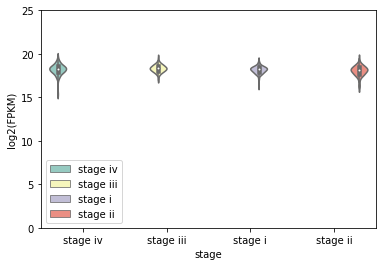

In [270]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.violinplot(x='tumor_stage', y='ENSG00000141510', data=df_t_uniq_merge, hue='tumor_stage', dodge=True,
              jitter=True, color='black', palette='Set3', ax=ax)

ax.set_xlabel('stage')
ax.set_ylabel('log2(FPKM)')
ax.set_ylim(0, 25)
ax.legend()
plt.show()

## 違いを見つける

pandasのデータフレーム（の発現量の部分）をnumpy array に変換します。

In [271]:
import numpy as np

In [272]:
X = df_t_uniq_merge.drop('tumor_stage', axis=1).to_numpy()

ステージを目標変数とします。

そのために、カテゴリカル変数を任意の数値に変換します。

In [273]:
Y = df_t_uniq_merge['tumor_stage'].map({'stage i': 0, 'stage ii': 0, 'stage iii': 1, 'stage iv':1})

### LASSOの実行

LASSO は教師あり変数選択の手法の一つです。

まず、LASSOのハイパーパラメータの値を決定するために交差検証法（クロスバリデーション）を行います。

In [274]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

scaler = StandardScaler()
clf = LassoCV(alphas=10 ** np.arange(-6, 1, 0.1), cv=5)

scaler.fit(X)
clf.fit(scaler.transform(X), Y)

print(clf.alpha_)

print(clf.coef_)

print(clf.intercept_)

0.03162277660168263
[-0.  0.  0. ... -0.  0. -0.]
0.3889943074003793


次にLASSOを実行します

In [275]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

scaler = StandardScaler()
clf = Lasso(alpha=clf.alpha_)

scaler.fit(X)
clf.fit(scaler.transform(X), Y)

print(clf.coef_)

print(clf.intercept_)

[-0.  0.  0. ... -0.  0. -0.]
0.3889943074003793


### 係数がトップの遺伝子を調べる

In [276]:
max_index = np.argmax(clf.coef_)
print(max_index)
df_t_uniq_merge.columns[max_index]

33524


'ENSG00000158864'

その遺伝子の発現量を可視化します。

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


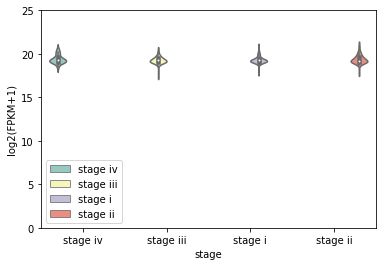

In [277]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.violinplot(x='tumor_stage', y=df_t_uniq_merge.columns[max_index], data=df_t_uniq_merge, 
               hue='tumor_stage', dodge=True,
              jitter=True, color='black', palette='Set3', ax=ax)

ax.set_xlabel('stage')
ax.set_ylabel('log2(FPKM+1)')
ax.set_ylim(0, 25)
ax.legend()
plt.show()

### 係数トップ10の遺伝子発現量を可視化する

In [278]:
df_t_uniq_merge.columns[np.argsort(-clf.coef_)[:10]]

Index(['ENSG00000158864', 'ENSG00000206932', 'ENSG00000245112',
       'ENSG00000281721', 'ENSG00000234112', 'ENSG00000276674',
       'ENSG00000230454', 'ENSG00000143702', 'ENSG00000233183',
       'ENSG00000070950'],
      dtype='object')

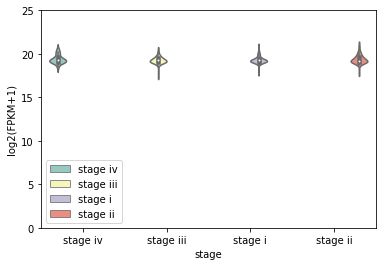

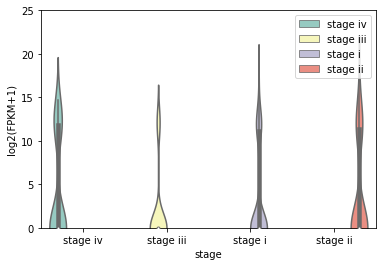

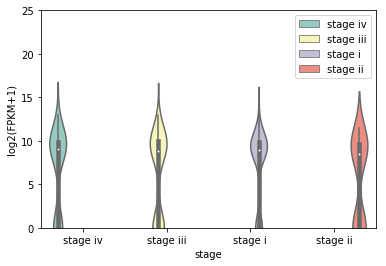

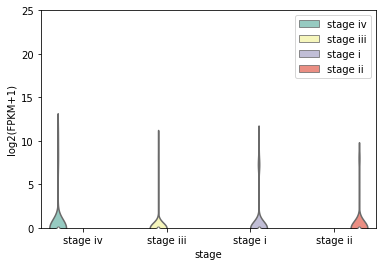

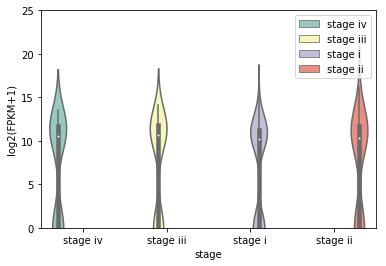

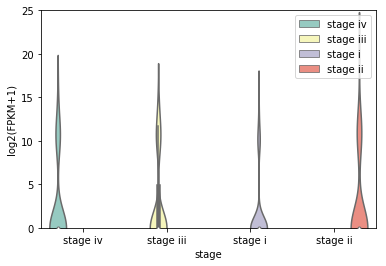

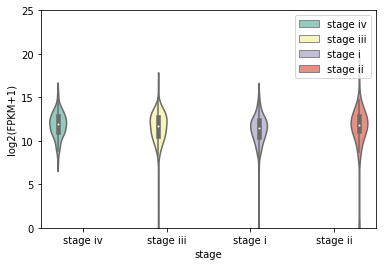

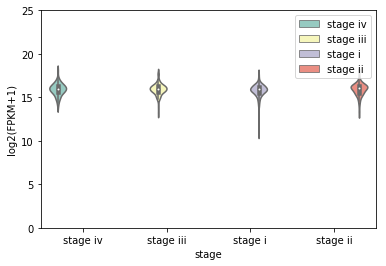

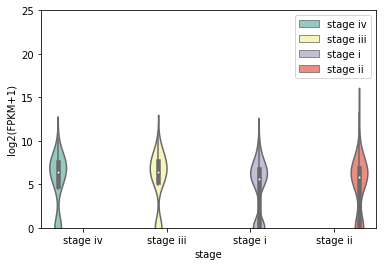

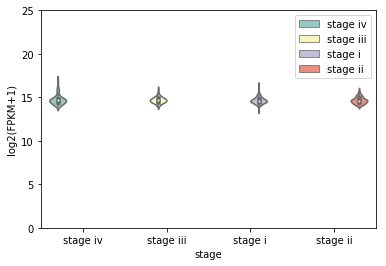

In [279]:
for i in np.argsort(-clf.coef_)[:10]:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    sns.violinplot(x='tumor_stage', y=df_t_uniq_merge.columns[i], data=df_t_uniq_merge, 
                   hue='tumor_stage', dodge=True,
                  jitter=True, color='black', palette='Set3', ax=ax)

    ax.set_xlabel('stage')
    ax.set_ylabel('log2(FPKM+1)')
    ax.set_ylim(0, 25)
    ax.legend()
    plt.show()

遺伝子ごと、stageごとの発現量の統計量を表示します。

In [280]:
df_t_uniq_merge[['tumor_stage', 'ENSG00000083896']].groupby('tumor_stage').describe().unstack(1)

                        tumor_stage
ENSG00000083896  count  stage i        265.000000
                        stage ii        57.000000
                        stage iii      123.000000
                        stage iv        82.000000
                 mean   stage i         18.165132
                        stage ii        18.108520
                        stage iii       18.044765
                        stage iv        18.012610
                 std    stage i          0.320290
                        stage ii         0.412927
                        stage iii        0.332146
                        stage iv         0.294112
                 min    stage i         16.973983
                        stage ii        16.795718
                        stage iii       17.123561
                        stage iv        17.239763
                 25%    stage i         17.978448
                        stage ii        17.909105
                        stage iii       17.827288
              

In [281]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

scaler = StandardScaler()
clf = LassoCV(alphas=10 ** np.arange(-6, 1, 0.1), cv=5)

scaler.fit(x_train)
clf.fit(scaler.transform(x_train), y_train)

y_pred = clf.predict(scaler.transform(x_test))
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.2212553272422493


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


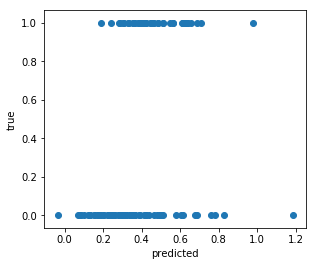

In [282]:
from matplotlib import pyplot as plt
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_pred, y_test)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
ax.set_aspect('equal')

fig.show()